# Probabilités et statistiques Domaine: Regression lineaire et non lineaire 

### 1 STATISTIQUE DESCRIPTIVE UNIVARIEE


##### 1.1 NOMBRE D’ENFANTS PAR FEMME

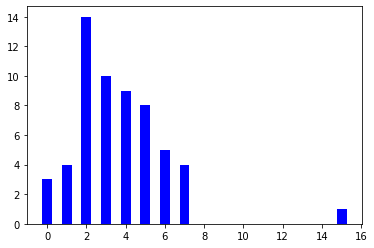

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig = plt.figure()

nb_enfants = [0,1,2,3,4,5,6,7,15]
nb_femmes = [3,4,14,10,9,8,5,4,1]
width = 0.5


plt.bar(nb_enfants, nb_femmes, width, color='b' )

plt.savefig('SimpleBar.png')
plt.show()

In [9]:

    
    
def effectif_to_frequence(effectifs):
    """list(int)->list(float)
        A partir d’une liste d’effectifs
        retourne la liste des fr´equences"""
    n = len(effectifs)
    frequences = []
    S = sum(effectifs)
    for k in range(n):
        frequences += [ effectifs[k]/S ]
    return frequences

def frequence_to_frequence_cumule(F):
    """list(float)->list(float)"""
    C = [F[0]]
    for i in range(1,len(F)):
        C += [ C[-1] + F[i] ]
    return C

In [19]:
frequences = effectif_to_frequence(nb_femmes)
frequencs_cumules = frequence_to_frequence_cumule(frequences)
frequencs_cumules

[0.05172413793103448,
 0.12068965517241378,
 0.3620689655172414,
 0.5344827586206897,
 0.6896551724137931,
 0.8275862068965518,
 0.913793103448276,
 0.9827586206896554,
 1.0000000000000002]

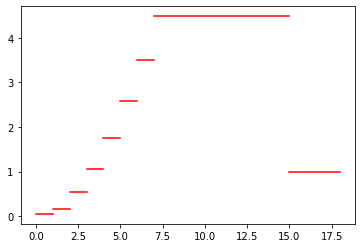

In [26]:
def courbes_freq_cumul(X,F):
    """list(float),list(float)->list(float)
        les deux listes X et E sont de m^eme longueur
        trace une courbe"""
    n = len(X)
    S = 0
    for i in range(n-1):
        S = S + F[i]
        plt.plot([X[i],X[i+1]],[S,S], color='r')
    plt.plot([X[n-1],X[n-1]+3],[1,1], color='r')
    
courbes_freq_cumul(nb_enfants,frequencs_cumules)


In [36]:
def moyenne(X):
    """list(float)->float"""
    n = len(X)
    m = X[0]
    for i in range(1,n):
        m += X[i]
    return m/n

moyenne_femmes = moyenne(nb_femmes)
moyenne_enfants = moyenne(nb_enfants)


def mediane(X):
    n = len(X)
    if n%2 == 1:
       return X[(n-1)//2]
    else:
        return (X[(n-2)//2]+X[n//2])/2 
mediane_femmes = mediane(nb_femmes)
mediane_enfants = mediane(nb_enfants)


def mode(X,E):
    n = len(X)
    M = E[0]
    S = [X[0]]
    for i in range(1,n):
        if M < E[i]:
            M = E[i]
            S = [X[i]]
        elif M == E[i]:
            S += [X[i]]
    return S

mode_val = mode(nb_enfants,nb_femmes)


print(f"""      
      La moyenne des femmes est de {moyenne_femmes}. 
      La moyenne des enfants est de {moyenne_enfants}.
      la mediane des femmes est de {mediane_femmes}.
      La mediane des enfants est de {mediane_enfants}. 
      Le mode est de {mode_val}""")


      
      La moyenne des femmes est de 6.444444444444445. 
      La moyenne des enfants est de 4.777777777777778.
      la mediane des femmes est de 9.
      La mediane des enfants est de 4. 
      Le mode est de [2]


[2]

In [47]:



#calculate interquartile range 
q3, q1 = np.percentile(nb_femmes, [75 ,25])
iqr = q3 - q1
iqr

entendue = 15 -np.mean(nb_enfants)

print(f""" 
        L'entendue est de {entendue}.
        l'espace interquartile est de {iqr}
        l'écart type est de {np.std(nb_femmes)}
        l'écart moyen absolu est de {np.mean(np.absolute(nb_femmes - np.mean(nb_femmes)))}
    """)



 
        L'entendue est de 10.222222222222221.
        l'espace interquartile est de 5.0
        l'écart type est de 3.8618104882183926
        l'écart moyen absolu est de 3.382716049382716
    


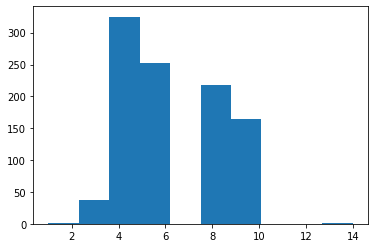


95.0 % intervalle de confience 3.0 et 10.0


In [56]:
import numpy 
from sklearn.utils import resample 
  
x = numpy.array(nb_femmes) 
  
n_iterations = 1000
n_size = int(len(x)) 
  
medians = list() 
for i in range(n_iterations): 
   s = resample(x, n_samples=n_size); 
   m = numpy.median(s); 
   medians.append(m) 
  
plt.hist(medians) 
plt.show() 
  
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p) 
  
print(f"\n{alpha*100} % intervalle de confience {lower} et {upper}")


{'whiskers': [<matplotlib.lines.Line2D at 0x11d8c1100>,
 'caps': [<matplotlib.lines.Line2D at 0x11d8c1760>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d8b6d90>],
 'medians': [<matplotlib.lines.Line2D at 0x11d8c1e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x11d8c9250>],
 'means': []}

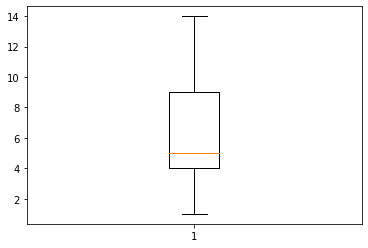

In [48]:
plt.boxplot(nb_femmes)

In [63]:
#  Find the outliers 
q3, q1 = np.percentile(nb_enfants, [75 ,25])
iqr = q3 - q1
iqr
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

print(f"""\n{lower_bound} et {upper_bound},
      toutes les valeurs qui ne sont pas comprises dans cet intervalle sont des outliers,
      par cosequent on obtient un outlier qui est {nb_enfants[-1]}""")


-4.0 et 12.0,
      toutes les valeurs qui ne sont pas comprises dans cet intervalle sont des outliers,
      par cosequent on obtient un outlier qui est 15


In [ ]:
df = DataFrame(nb_femmes)